## Problem Statement

Predict the bike sharing counts per hour based on features

## Objectives

At the end of the notebook we will perfom
1. performing data exploration and visulization
2. Implementing Linear regression and optimization
3. Applying regulizers lasso and Ridge
4. Performance measure and comparision of each regressor

## Dataset

The dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike sharing system with the corresponding weather and seasonal information.

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset



In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# sklearn package
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score


## Data Exploration and Visulization

In [ ]:
# loading Data

data = pd.read_csv('/content/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Five point Summary
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


From Describe function we get mean, standard deviation,min,max and 25,50,75 percentile of numeric data


In [ ]:
# checking missing duplicates values in data set
print(data.isnull().sum())
print(data.duplicated().sum())
print(data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


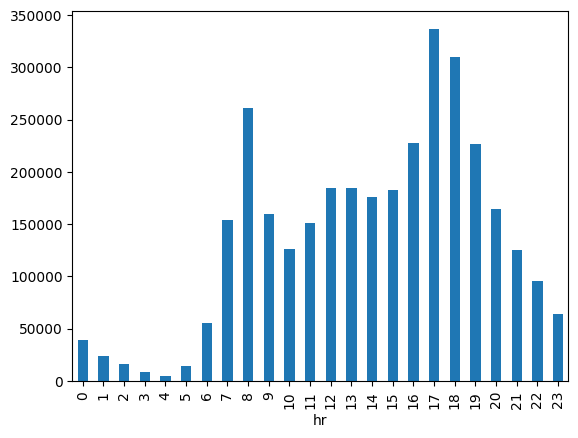

In [ ]:
#visualizing the hour column with appropriate plot and find the busy hours of bike sharing
data.groupby('hr').sum('cnt')['cnt'].plot.bar()
plt.show()

From above plot we can observe 8,16 to 19 hrs are busy hours

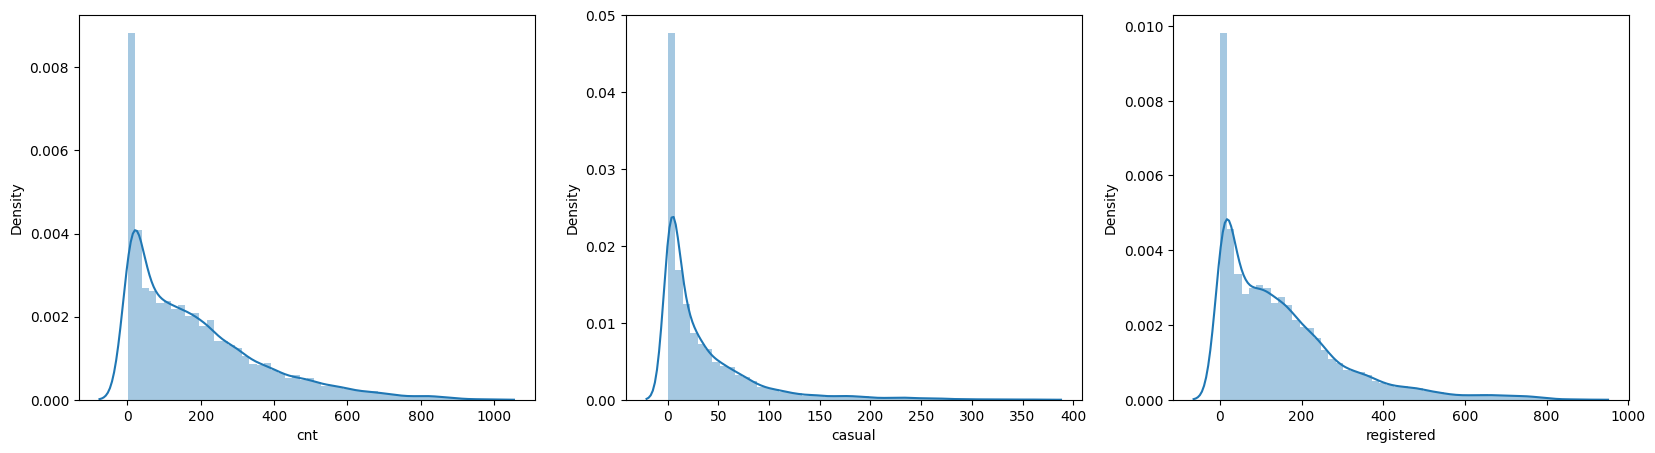

In [ ]:
# visulaize the distribution of count, casual and registered varibales
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(data['cnt'])
plt.subplot(1,3,2)
sns.distplot(data['casual'])
plt.subplot(1,3,3)
sns.distplot(data['registered'])
plt.show()

1. The overall distribution of cnt can be observered we can say most of the counts are from 0 to 200

2. The overall distribution of casual can be observered we can say most of the counts are from 0 to 50

3. The overall distribution of registered can be observered we can say most of the counts are from 0 to 250

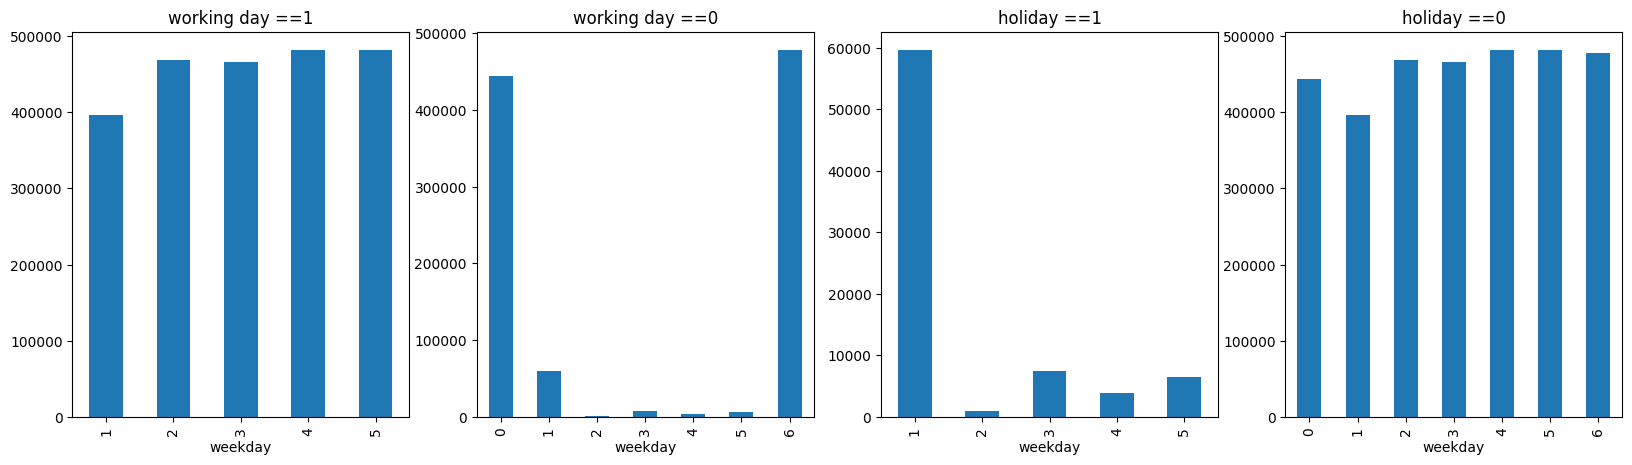

In [ ]:
# Describe the relation of weekday,holiday and working day
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
data[data['workingday']==1].groupby('weekday').sum('cnt')['cnt'].plot.bar()
plt.title('working day ==1')
plt.subplot(1,4,2)
data[data['workingday']==0].groupby('weekday').sum('cnt')['cnt'].plot.bar()
plt.title('working day ==0')
plt.subplot(1,4,3)
data[data['holiday']==1].groupby('weekday').sum('cnt')['cnt'].plot.bar()
plt.title('holiday ==1')
plt.subplot(1,4,4)
data[data['holiday']==0].groupby('weekday').sum('cnt')['cnt'].plot.bar()
plt.title('holiday ==0')
plt.show()

Here 1-5 are monday to friday , 0,6 --> sunday and saturday
1. when workingday==1 the count of bike sharing is more on tue to friday compare to monday
2. when workingday==0 the count of bike sharing is more on sat and sun compare to (mon-fri)
3. when hoilday == 1 the  count of bike sharing is more on monday compare to rest of weekdays (mon to fri)
4. when holiday== 0 the count of bike sharing looks good on all days in weekdays

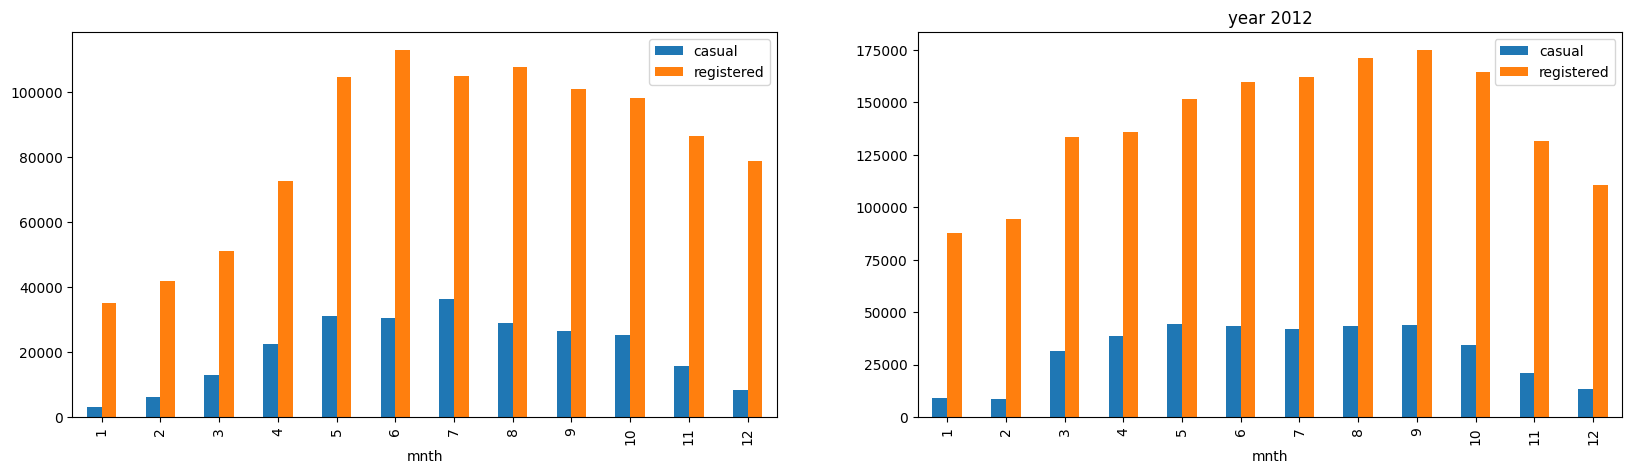

In [ ]:
## visualize monthly wise count of both casual and register year wise seperately
fig,ax = plt.subplots(1,2,figsize=(20,5))
data[data['yr']==0].groupby('mnth').sum(['casual','registered'])[['casual','registered']].plot.bar(ax=ax[0])
plt.title('year 2011')
data[data['yr']==1].groupby('mnth').sum(['casual','registered'])[['casual','registered']].plot.bar(ax=ax[1])
plt.title('year 2012')
plt.show()

1. In 2011 Reistered count is less in jan feb mar and more in rest of months and peak in june month. similarly casual count is less in jan, feb ,mar, dec and rest all months are higher and peak in july

2. In 2012 resistered count is less in jan,feb and high in rest of months where peak is in sep month. similarly casual count is less in jan, feb and more in rest of months and peak in may and sep


The overall count of casual and regsitered  of 2012 is more from 2011

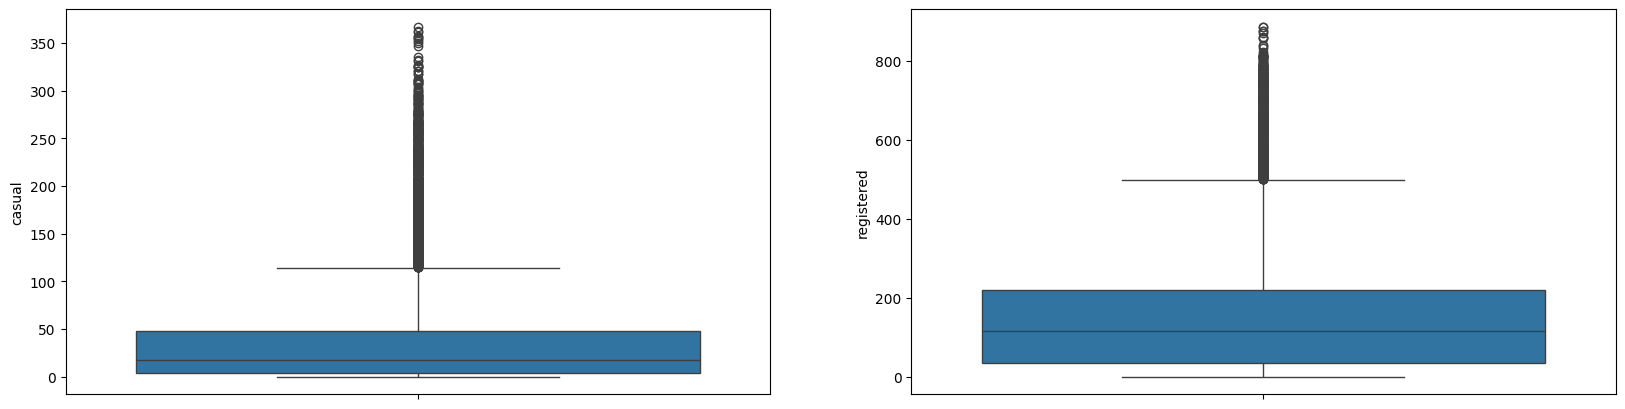

In [ ]:
# Box plot to identify the outliers for casual and registered
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['casual'],ax=ax[0])
sns.boxplot(data['registered'],ax=ax[1])
plt.show()

These looks like outliers but these are to be considered for analysis because as seasons varies people do go in bicycle compare to other seasons

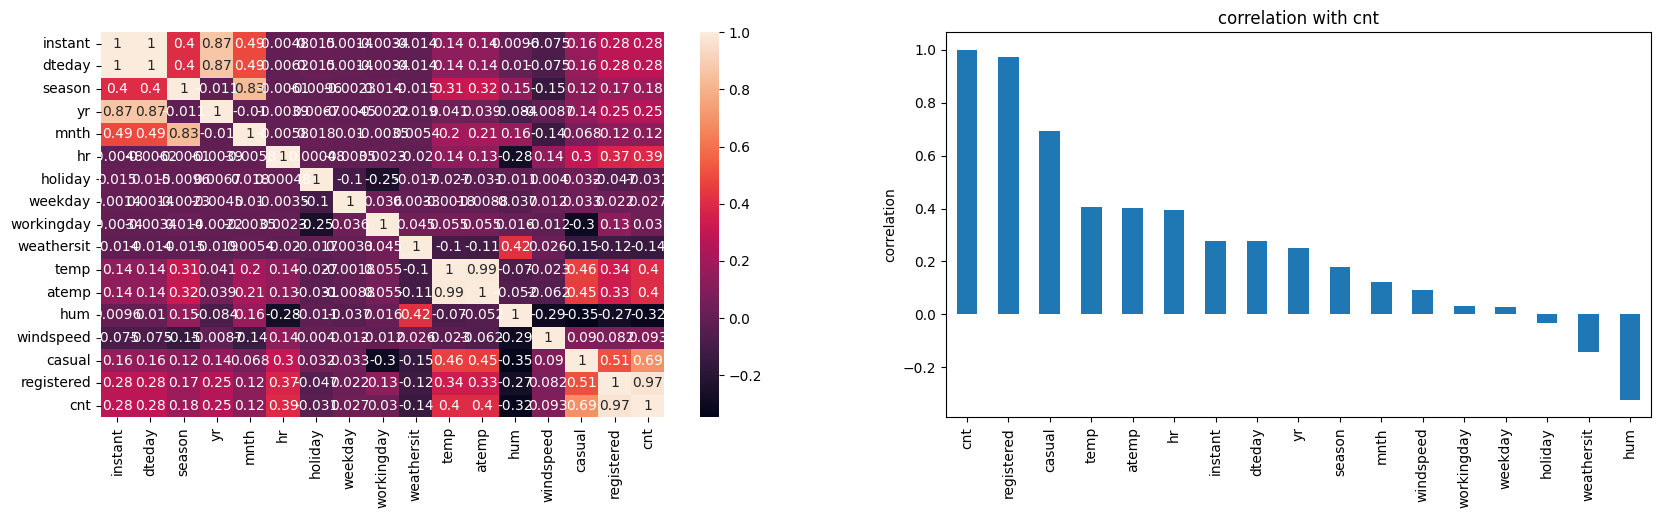

In [ ]:
# heatmap for correlation
data['dteday'] = pd.to_datetime(data['dteday'])
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.heatmap(data.corr(),annot=True,ax=ax[0])
plt.title('correlation matrix')
data.corr()['cnt'].sort_values(ascending=False).plot.bar(ax=ax[1])
plt.ylabel('correlation')
plt.title('correlation with cnt')
plt.show()

With heatmap we can see correaltion of targtet varibale cnt with other features. workingday weekday holiday is not strongly correlated with cnt we can remove them as well and if we observe atemp and temp are highly correlated so one we can drop one among them because both are providing same information.  similarly yr with dtdate is also highly correlated among three one is enough because they providing same info almost dtdate has yr information as well

## Data Preprocessing and Data Engineering

In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# Dropping unwanted columns
data_new = data.drop(['instant','dteday','temp'],axis=1)
data_new.shape

(17379, 14)

In [ ]:
# identifying categorical and continious variables
cat_cols = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']
cont_cols = ['atemp','hum','windspeed']

In [ ]:
# Feature Scaling

std_scaler = StandardScaler()
scaled_data =pd.DataFrame(std_scaler.fit_transform(data_new[cont_cols]),columns=cont_cols)
scaled_data.head()

,atemp,hum,windspeed
0,-1.093281,0.947372,-1.553889
1,-1.181732,0.895539,-1.553889
2,-1.181732,0.895539,-1.553889
3,-1.093281,0.636370,-1.553889
4,-1.093281,0.636370,-1.553889


In [ ]:
# one hot encoding

one_hot_encoder = OneHotEncoder(sparse=False,)
encoded_data = one_hot_encoder.fit_transform(data_new[cat_cols])
encoded_data = pd.DataFrame(encoded_data,columns=one_hot_encoder.get_feature_names_out())
encoded_data.head()

,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
features = pd.concat([scaled_data,encoded_data],axis=1)
targets = data_new[['cnt','casual','registered']]

## Linear Regression,Ridge,Lasso, ElasticNet using Sklearn package

In [ ]:
target = targets['cnt']

In [ ]:
# spilitting the data into development set and test set
X_dev,X_test,y_dev,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
print(X_dev.shape,X_test.shape,y_dev.shape,y_test.shape)

(13903, 60) (3476, 60) (13903,) (3476,)


In [ ]:
# splitting the development set into train and validation set
X_train,X_val,y_train,y_val = train_test_split(X_dev,y_dev,test_size=0.2,random_state=40)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(11122, 60) (2781, 60) (11122,) (2781,)


In [ ]:
MODEL=[]
MSE=[]
R2=[]

In [ ]:
# vennila linear regression model
model_lin = LinearRegression()
model_lin.fit(X_train,y_train)
pred_lin = model_lin.predict(X_val)

In [ ]:
# metrics evaluation for the perfromance of model
MSE_linear = mean_squared_error(y_val,pred_lin)
R2_linear = r2_score(y_val,pred_lin)
print('MSE :',MSE_linear)
print('R2 :',R2_linear)
MODEL.append('Linear Regression')
MSE.append(MSE_linear)
R2.append(R2_linear)

MSE : 10110.99360581569
R2 : 0.6754081517387669


Considering R2 score as metric for model perfomance we got 0.675 is not acceptable model. For better model and good model R2 should be more. R2 =1 is exact fit model

In [ ]:
# Regulization method Lasso Regression
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
model_lasso = Lasso()
model_lasso_cv = GridSearchCV(model_lasso,parameters,cv=5)
model_lasso_cv.fit(X_train,y_train)
print(model_lasso_cv.best_params_)

{'alpha': 0.01}


In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train,y_train)
pred_lasso = model_lasso.predict(X_val)
MSE_lasso = mean_squared_error(y_val,pred_lasso)
R2_lasso = r2_score(y_val,pred_lasso)
print('MSE :',MSE_lasso)
print('R2 :',R2_lasso)
MODEL.append('Lasso Regression')
MSE.append(MSE_lasso)
R2.append(R2_lasso)

MSE : 10117.328931646309
R2 : 0.6752047696379697


In [ ]:
# Regulization method Ridge Regression
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
model_ridge = Ridge()
model_ridge_cv = GridSearchCV(model_ridge,parameters,cv=5)
model_ridge_cv.fit(X_train,y_train)
print(model_ridge_cv.best_params_)

{'alpha': 1}


In [ ]:
model_ridge = Ridge(alpha=0.01)
model_ridge.fit(X_train,y_train)
pred_ridge = model_ridge.predict(X_val)
MSE_ridge = mean_squared_error(y_val,pred_ridge)
R2_ridge = r2_score(y_val,pred_ridge)
print('MSE :',MSE_ridge)
print('R2 :',R2_ridge)
MODEL.append('Ridge Regression')
MSE.append(MSE_ridge)
R2.append(R2_ridge)

MSE : 10118.373401156681
R2 : 0.6751712391757776


In [ ]:
# ElasticNet regressor
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
model_elastic = ElasticNet()
model_elastic_cv = GridSearchCV(model_elastic,parameters,cv=5)
model_elastic_cv.fit(X_train,y_train)
print(model_elastic_cv.best_params_)

{'alpha': 0.0001}


In [ ]:
model_elastic = ElasticNet(alpha=0.0001)
model_elastic.fit(X_train,y_train)
pred_elastic = model_elastic.predict(X_val)
MSE_elastic = mean_squared_error(y_val,pred_elastic)
R2_elastic = r2_score(y_val,pred_elastic)
print('MSE :',MSE_elastic)
print('R2 :',R2_elastic)
MODEL.append('ElasticNet Regression')
MSE.append(MSE_elastic)
R2.append(R2_elastic)

MSE : 10116.267924517108
R2 : 0.6752388310050828


In [ ]:
model_comparision = pd.DataFrame({'Model':MODEL,'MSE':MSE,'R2':R2})
model_comparision

,Model,MSE,R2
0,Linear Regression,10110.993606,0.675408
1,Lasso Regression,10117.328932,0.675205
2,Ridge Regression,10118.373401,0.675171
3,ElasticNet Regression,10116.267925,0.675239


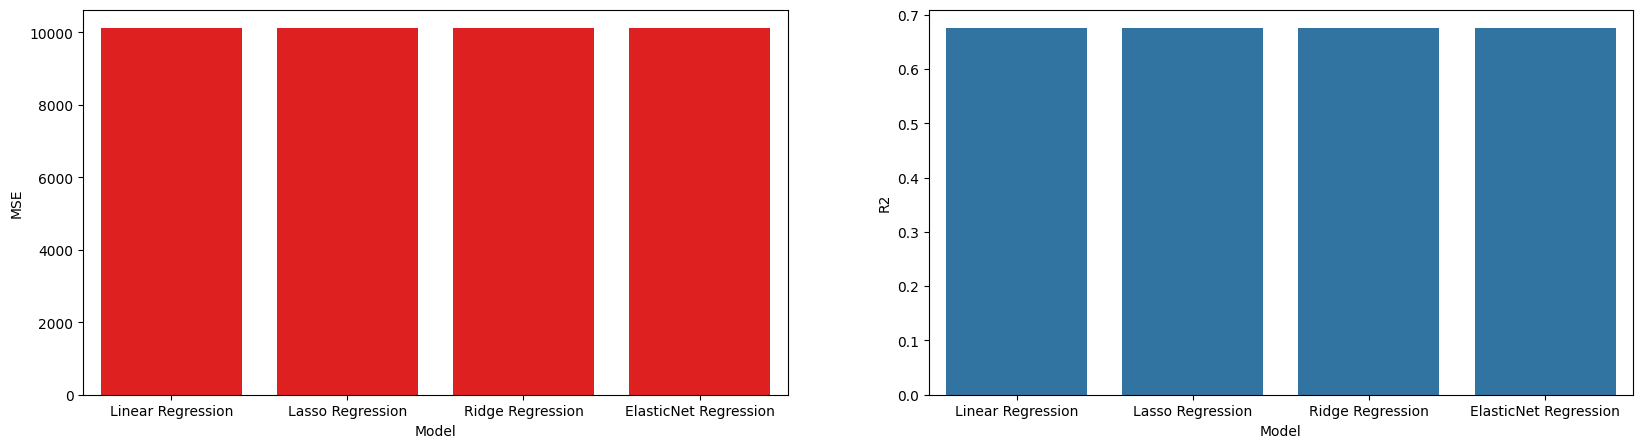

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x='Model',y='MSE',data=model_comparision,color='r')
plt.subplot(1,2,2)
sns.barplot(x='Model',y='R2',data=model_comparision)
plt.show()

Among all vennila Linear regression model achieved less MSE and better R2_score . We would test actual testdata with vennila Linear regressor for

In [ ]:
# Testing on Actual test data where model never seen before
test_pred = model_lin.predict(X_test)
MSE_test = mean_squared_error(y_test,test_pred)
R2_test = r2_score(y_test,test_pred)
print('MSE :',MSE_test)
print('R2 :',R2_test)

MSE : 10128.550086474666
R2 : 0.6801383699439407


We can observe R2 score of Actual test set is 0.68 to R2 score of validation set 0.675  so we can say our model is not undefit or overfit and model is more generic to any input data